<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Experimenting" data-toc-modified-id="Experimenting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Experimenting</a></span></li><li><span><a href="#Main_draft" data-toc-modified-id="Main_draft-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Main_draft</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Visualizing-Data" data-toc-modified-id="Visualizing-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualizing Data</a></span></li><li><span><a href="#Data-Preprocessing-&amp;-Augmentation" data-toc-modified-id="Data-Preprocessing-&amp;-Augmentation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data Preprocessing &amp; Augmentation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Weighted-Model" data-toc-modified-id="Weighted-Model-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Weighted Model</a></span></li><li><span><a href="#Models-with-different-optimizers" data-toc-modified-id="Models-with-different-optimizers-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Models with different optimizers</a></span><ul class="toc-item"><li><span><a href="#Del" data-toc-modified-id="Del-2.5.3.1"><span class="toc-item-num">2.5.3.1&nbsp;&nbsp;</span>Del</a></span></li></ul></li></ul></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#VGG16" data-toc-modified-id="VGG16-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>VGG16</a></span><ul class="toc-item"><li><span><a href="#Fine-Tuning" data-toc-modified-id="Fine-Tuning-2.6.1.1"><span class="toc-item-num">2.6.1.1&nbsp;&nbsp;</span>Fine Tuning</a></span></li><li><span><a href="#temp" data-toc-modified-id="temp-2.6.1.2"><span class="toc-item-num">2.6.1.2&nbsp;&nbsp;</span>temp</a></span></li></ul></li><li><span><a href="#VGG19" data-toc-modified-id="VGG19-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>VGG19</a></span></li><li><span><a href="#Xception" data-toc-modified-id="Xception-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Xception</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Future Work</a></span></li></ul></li></ul></div>

# Experimenting

In [1]:
from pathlib import Path # Loading in the data
import pandas as pd

In [2]:
data_dir = Path.cwd().parent / "Test_Data"

In [3]:
# Define path to the data directory
# data_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')
data_dir = Path.cwd().parent / "Test_Data"

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [4]:
data_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data')

In [5]:
train_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/train')

In [6]:
val_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/val')

In [7]:
test_dir

WindowsPath('C:/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/Test_Data/test')

In [8]:
normal_cases_dir

NameError: name 'normal_cases_dir' is not defined

In [ ]:
pneumonia_cases_dir

In [ ]:
import glob
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
# normal_cases = normal_cases_dir.glob('*.jpeg')
# pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

#########
normal_cases = train_dir.glob("*")
pneumonia_cases = pneumonia_cases_dir.glob('*')
#########

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))
    print('test1')

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))
    print('test2')

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
# train_data = train_data.sample(frac=1.).reset_index(drop=True)

# Previewing the df
print('test3')
train_data.head()

In [ ]:
os.listdir()

In [ ]:
normal_cases

In [ ]:
train_data.info()

In [ ]:
############################################################################

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data_dir = Path.cwd().parent / "Test_Data"
train_dir = data_dir / 'train'

In [ ]:
train = get_training_data('../Data/train')


In [ ]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

In [ ]:
############################################################################

In [ ]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# print(os.listdir("../input"))
# print(os.listdir())
mainDIR = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray')

# sub_dir = main_dir / 'archive'
# print(os.listdir('../Test_Data'))

In [ ]:
mainDIR

In [ ]:
# mainDIR = os.listdir('../input/chest_xray/chest_xray')
# print(mainDIR)

In [ ]:
train_folder = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train')
val_folder = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/val')
test_folder = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/test')

In [ ]:
train_folder

In [ ]:
val_folder

In [ ]:
# train_folder = '../input/chest_xray/chest_xray/train/'
# val_folder = '../input/chest_xray/chest_xray/val/'
# test_folder = '../input/chest_xray/chest_xray/test/'

In [ ]:
train_folder

In [ ]:
# # train 
# os.listdir(train_folder)
# train_n = train_folder+'NORMAL/'
# train_p = train_folder+'PNEUMONIA/'

In [ ]:
train_n = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL'
train_p = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA'

In [ ]:
train_n

In [ ]:
testing_train_n = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL')
testing_train_p = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA')

In [ ]:
testing_train_n

In [ ]:
train_imgs_n = [file for file in testing_train_n if file.endswith('.jpeg')]

In [ ]:
train_imgs_n

In [ ]:
df_testing = pd.DataFrame(train_imgs_n, columns=['test'])
df_testing

In [ ]:
df_testing = pd.DataFrame(train_imgs_n, columns=['img'])
df_testing

In [ ]:
df_testing['label'] = 0

In [ ]:
df_testing

In [ ]:
train_df = pd.concat()

In [ ]:
################################
# Visualizing

In [ ]:
img = plt.imread(train_imgs_n[1])

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train_imgs_n[1], cmap='gray')

In [ ]:
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
plt.imread(test)

In [ ]:
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
plt.imshow(test)

In [ ]:
from PIL import Image
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
norm_load = Image.open(test)
plt.imshow(norm_load, cmap='gray');

In [ ]:
######################

In [ ]:
train_imgs_n

In [ ]:
test = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/'

In [ ]:
test2 = test + 'IM-0117-0001.jpeg'
test2

In [ ]:
test_list = []
for img in train_imgs_n:
    test_list.append(test + img)

In [ ]:
test_list

In [ ]:
norm_load = Image.open(test_list[1])
plt.imshow(norm_load, cmap='gray');

In [ ]:
test_test_list = test_list[:10]

In [ ]:
for img in test_test_list:
    print('test')
    norm_load = Image.open(img)
    plt.imshow(norm_load, cmap='gray');

In [ ]:
############################################################################

In [ ]:
# plt.figure(figsize = (5,5))
# plt.imshow(train[0][0], cmap='gray')
# plt.title(labels[train[0][1]])

# plt.figure(figsize = (5,5))
# plt.imshow(train[-1][0], cmap='gray')
# plt.title(labels[train[-1][1]])

In [ ]:
train_n

In [ ]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [ ]:
#############

In [ ]:
test_train_n

In [ ]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [ ]:
# from skimage.io import imread
# img = imread(test_train_n[1])
# ax[i//5, i%5].imshow(img, cmap='gray')

from skimage.io import imread
img = imread(test_train_n[1])
img.imshow(img, cmap='gray')

In [ ]:
########################

In [ ]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [ ]:
# Do not forget to include the last slash
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
#     norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
#     pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files])
    
    pneu_images = []
    for image in tqdm(pneu_files):
        image = cv2.imread(pneu_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels

In [ ]:
# norm_images, norm_labels = load_normal('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/')
# pneu_images, pneu_labels = load_pneumonia('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')

In [ ]:
train_n
norm_images = load_normal(train_n)
# pneu_images, pneu_labels = load_pneumonia('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')

In [ ]:
#################

In [ ]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [ ]:
# Do not forget to include the last slash
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
    pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files])
    
    pneu_images = []
    for image in tqdm(pneu_files):
        image = cv2.imread(pneu_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels

In [ ]:
norm_images = load_normal(train_n)

In [ ]:
#######################################################
# Model

In [ ]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
num_of_test_samples = 600
batch_size = 32

In [ ]:
train_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/'
val_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/val/'
test_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/test/'

In [ ]:
# #  Fitting the CNN to the images
# # The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

# training_set = train_datagen.flow_from_directory('../input/chest_xray/chest_xray/train',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')

# validation_generator = test_datagen.flow_from_directory('../input/chest_xray/chest_xray/val/',
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='binary')

# test_set = test_datagen.flow_from_directory('../input/chest_xray/chest_xray/test',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

In [ ]:
#  Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

In [ ]:
cnn.summary()

In [ ]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

In [ ]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

In [ ]:
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

In [ ]:
##########################################################################################################

# Main_draft

## Introduction

**Disclaimer**

**This project was completed for educational purposes only. Do not consider any of this as medical advice**

My objective with this project was to be able to use X-rays from pediatric patients to be able to identify whether or not the patient has pneumonia. I accomplished this task using deep learning and transfer models

As this was run on my personal work computer, some elements (such as number of epochs) have been reduced in some models to reduce time spent modeling. This can reduce model accuracy in some cases.


### Dataset
The data is not included in my github repository as it exceeds upload limits. To download the dataset you can visit [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) 
Or for a larger version of the dataset visit [Mendeley](https://data.mendeley.com/datasets/rscbjbr9sj/3) 

If you want to run the notebook you will need to change the download paths to where your files are located (this is mentioned in the notebook where you need to change it)

The dataset contains 5,863 X-Ray images (JPEG) that are split into 2 categories (Pneumonia/Normal), the dataset is highly unbalanced with more normal cases being represented. For each category the images are split into 3 folders (train, test, val) with Pneumonia/Normal cases appearing in all folders
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.


### Modeling
As there was limited data my main focus was on transfer models. I did some baseline models and experimented with a few things but quickly moved onto testing three transfer models (VGG16, VGG19, and Xception). All of these models were created for the Imagenet classification competition. For more information visit this [link](https://dl.acm.org/doi/10.1145/3065386) 

## Imports

In [1]:
# Imports
# visualization 
from PIL import Image
import os
import matplotlib.pyplot as plt

# Model
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

# Transfer
# from keras.applications import VGG19

# DS genreal
import numpy as np
import tensorflow as tf
import keras

# Eval
from sklearn.metrics import confusion_matrix, classification_report

## Visualizing Data

**Note:** If you are running this code yourself you will need to download the data from [kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) and change all of the paths to your local download path

In [3]:
# Create a list containing the names of the files in the directory
# If running yourself change all of the paths to your local download path
temp_train_n = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL')
temp_train_p = os.listdir('/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA')
 
# Select only images from temp_train_n
train_imgs_n = [file for file in temp_train_n if file.endswith('.jpeg')]
train_imgs_p = [file for file in temp_train_p if file.endswith('.jpeg')]

In [4]:
# Path of training NORMAL and PNEUMONIA cases
# If running yourself change all of the paths to your local download path
path_train_n = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/NORMAL/'
path_train_p = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/PNEUMONIA/'

In [5]:
# Loop through and create a path to each individual NORMAL image
list_train_n = []
for img in train_imgs_n:
    list_train_n.append(path_train_n + img)

# Loop through and create a path to each individual PNEUMONIA image
list_train_p = []
for img in train_imgs_p:
    list_train_p.append(path_train_p + img)

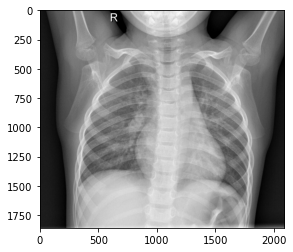

In [6]:
# Visualize the first NORMAL case
norm_load = Image.open(list_train_n[0])
plt.imshow(norm_load, cmap='gray');

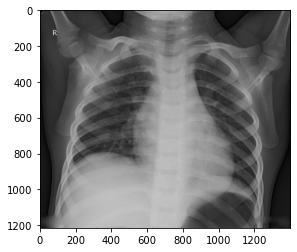

In [7]:
# Visualize the last NORMAL case
norm_load = Image.open(list_train_n[-1])
plt.imshow(norm_load, cmap='gray');

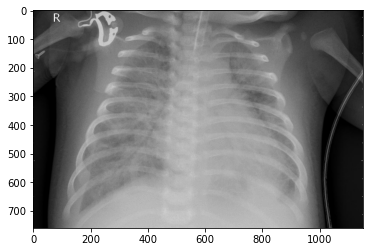

In [8]:
# Visualize the first PNEUMONIA case
norm_load = Image.open(list_train_p[0])
plt.imshow(norm_load, cmap='gray');

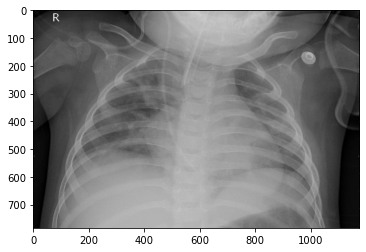

In [9]:
# Visualize the last PNEUMONIA case
norm_load = Image.open(list_train_p[-1])
plt.imshow(norm_load, cmap='gray');

Looking at the differences between the normal and pneumonia cases, the pneumonia cases seems to be "foggier" but if I was shown the imgs without knowing their labels it would be hard for me to guess for each img in the list. Let's see if our model can do better than me (not a doctor)

## Data Preprocessing & Augmentation 

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, you will standardize values to be in the [0, 1] range by using ImageDataGenerator(rescale = 1./255)

The function [ImageDataGenerator](https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/) class allows the users to perform image augmentation while training the model
 
For more info on Data Augmentation visit the above link or this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation) from TensorFlow

In [2]:
# Setting paths
# If running yourself change all of the paths to your local download path
train_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/train/'
val_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/val/'
test_path = '/Users/aiden.local/Documents/Flatiron/Course-Material/phase_4/project_phase_4/draft/Test_Data/archive/chest_xray/chest_xray/test/'

In [3]:
# Data augmentation

# Train augmentation
train_generator = ImageDataGenerator(
    rescale = 1./255, # rgb range to [0,1]
    # Several steps of augmentation 
    # (shearing, zooming and flipping)
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

# Apply train_generator to train data
training_set = train_generator.flow_from_directory(
    train_path,
    # resize images to 64x64
    target_size = (64, 64),
    class_mode = 'binary')

# Test and val augmentation
# Scale normalization rgb [0, 255] range to [0,1]
test_generator = ImageDataGenerator(rescale = 1./255)  

# Apply test_generator to test data
test_set = test_generator.flow_from_directory(
    test_path,
    # resize images to 64x64
    target_size = (64, 64),
    class_mode = 'binary')
# Uses same generator as test
# Apply test_generator to val data
validation_set = test_generator.flow_from_directory(
    val_path,
    # resize images to 64x64
    target_size=(64, 64),
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [12]:
# Found 5216 images belonging to 2 classes. - From training
# Found 16 images belonging to 2 classes. - From validation
# Found 624 images belonging to 2 classes. - From testing

In [48]:
# # # from keras import image_dataset_from_directory
# # import matplotlib.pyplot as plt
# # import numpy as np
# # import PIL
# # import tensorflow as tf

# # from tensorflow import keras
# # from tensorflow.keras import layers
# # from tensorflow.keras.models import Sequential
# # # tf.keras.utils.image_dataset_from_directory()
# # image_dataset_from_directory()


# import pathlib
# import numpy as np
# import os
# import PIL
# import PIL.Image
# import tensorflow as tf
# # import tensorflow_datasets as tfds

# train_ds = tf.keras.utils.image_dataset_from_directory(train_path)

AttributeError: module 'tensorflow.keras.utils' has no attribute 'image_dataset_from_directory'

**Note** The validation set from Kaggle is extremely small with only 16 images in total (from the 2 classes). I attempted to fix this by moving a selection of the images from the train directory to the val directory but could not get them to load properly. For the sake of time I chose to move on with the original data from Kaggle. This will make it difficult to gain meaningful results from the validation set analytics later on.

You can visit this [link](https://data.mendeley.com/datasets/rscbjbr9sj/3) for a larger scale of this dataset that is not from Kaggle. But it has a different structure so other preprocessing steps would likely be necessary

In [13]:
# get unique values and counts
ar_unique, i = np.unique(training_set.classes, return_counts=True)
# display the returned array
print("Unique values:", ar_unique)
# display the counts
print("Counts:", i)

# 0 is number of imgs in train NORMAL
# 1 is number of imgs in train PNEUMONIA

Unique values: [0 1]
Counts: [1341 3875]


Our dataset is highly unbalanced. We will be using label weights with our model. But there are other strategies like downsampling or upsampling the data. You can read more about these techniques [here](https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb) (Medium members only link, you get access to 3 free posts a month)

## Modeling

### Baseline Model

Our baseline model is a relatively simple CNN that I will be using to judge model performance against more complex models

In [50]:
# Initialize model
model_baseline = Sequential()

# First hidden layer
model_baseline.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Second hidden layer
model_baseline.add(Conv2D(32, (3, 3), activation="relu"))

# Flatten
model_baseline.add(Flatten())

# Output layer
model_baseline.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model_baseline.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

In [51]:
# Fit model on training set
# Save to history in order to more easily visualize later on
history1 = model_baseline.fit(
    training_set, 
    epochs = 5, 
    validation_data = validation_set)

Epoch 1/5
163/163 [==============================] - 105s 646ms/step - loss: 0.3774 - accuracy: 0.8426 - val_loss: 0.4277 - val_accuracy: 0.7500
Epoch 2/5
163/163 [==============================] - 108s 662ms/step - loss: 0.2696 - accuracy: 0.8911 - val_loss: 0.5881 - val_accuracy: 0.6875
Epoch 3/5
163/163 [==============================] - 112s 685ms/step - loss: 0.2204 - accuracy: 0.9091 - val_loss: 0.4483 - val_accuracy: 0.8750
Epoch 4/5
163/163 [==============================] - 112s 684ms/step - loss: 0.1874 - accuracy: 0.9239 - val_loss: 0.5398 - val_accuracy: 0.6875
Epoch 5/5
163/163 [==============================] - 113s 690ms/step - loss: 0.1721 - accuracy: 0.9333 - val_loss: 0.2865 - val_accuracy: 0.9375


In [16]:
# history1.history

{'loss': [0.39233842492103577,
  0.2591768205165863,
  0.2273959368467331,
  0.20276711881160736,
  0.18296130001544952],
 'accuracy': [0.8274539709091187,
  0.893980085849762,
  0.910467803478241,
  0.9177530407905579,
  0.925613522529602],
 'val_loss': [0.46781429648399353,
  0.4031175673007965,
  0.5655519962310791,
  0.46265554428100586,
  0.35817453265190125],
 'val_accuracy': [0.8125, 0.875, 0.75, 0.75, 0.8125]}

### Weighted Model

Our model architecture is actually the same as our baseline model we just impose weights to the labels as our data is highly unbalanced.

In [37]:
# Initialize model
model_weighted = Sequential()

# First hidden layer
model_weighted.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Second hidden layer
model_weighted.add(Conv2D(32, (3, 3), activation="relu"))

# Flatten
model_weighted.add(Flatten())

# Output layer
model_weighted.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model_weighted.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

In [38]:
# Fit model on training set
history2 = model_weighted.fit(
    training_set, 
    epochs = 2,
    validation_data = validation_set,
    # model weight. Calculated from level of unbalance in data
    class_weight={0:2.8 , 1:1}) 

Epoch 1/2
163/163 [==============================] - 111s 681ms/step - loss: 0.7185 - accuracy: 0.7801 - val_loss: 0.6192 - val_accuracy: 0.6250
Epoch 2/2
163/163 [==============================] - 109s 669ms/step - loss: 0.4252 - accuracy: 0.8771 - val_loss: 0.4253 - val_accuracy: 0.8125


In [19]:
history2.history

{'loss': [0.7412524819374084, 0.4445553123950958],
 'accuracy': [0.7561349868774414, 0.8698236346244812],
 'val_loss': [0.35773786902427673, 0.33488529920578003],
 'val_accuracy': [0.9375, 0.8125]}

In [20]:
# # Fit model on training set
# history2 = model_weighted.fit(
#     training_set, 
#     steps_per_epoch = 163,
#     epochs = 5,
#     validation_data = validation_set,
#     validation_steps = 50,
#     class_weight={0:2.8 , 1:1}) # model weight

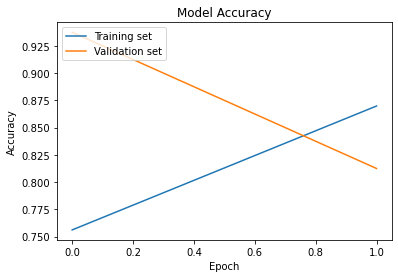

In [21]:
# Accuracy graphing
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

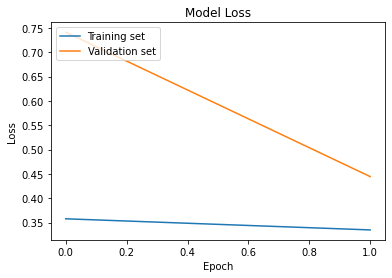

In [22]:
# Loss graphing
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

### Models with different optimizers

Adam is currently one of the most popular and powerful optimizers. Here we will quickly try a few others with the same architecture as our previous models to act as a baseline.

For more details on these optimizers check out the [documentation](https://keras.io/api/optimizers/)

In [23]:
# Initialize model
model_rmsprop = Sequential()

# First hidden layer
model_rmsprop.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Second hidden layer
model_rmsprop.add(Conv2D(32, (3, 3), activation="relu"))

# Flatten
model_rmsprop.add(Flatten())

# Output layer
model_rmsprop.add(Dense(1, activation = 'sigmoid'))

In [24]:
# Compile the model with RMSprop optimizer
model_rmsprop.compile(optimizer = 'RMSprop',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

# Fit the model
history3 = model_rmsprop.fit(
    training_set, 
    epochs = 25,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # model weight 

Epoch 1/25
163/163 [==============================] - 110s 673ms/step - loss: 0.8869 - accuracy: 0.7345 - val_loss: 0.4500 - val_accuracy: 0.7500
Epoch 2/25
163/163 [==============================] - 110s 677ms/step - loss: 0.4869 - accuracy: 0.8602 - val_loss: 0.3422 - val_accuracy: 0.8750
Epoch 3/25
163/163 [==============================] - 109s 670ms/step - loss: 0.4277 - accuracy: 0.8785 - val_loss: 0.4237 - val_accuracy: 0.7500
Epoch 4/25
163/163 [==============================] - 111s 678ms/step - loss: 0.3790 - accuracy: 0.8934 - val_loss: 0.3193 - val_accuracy: 0.8750
Epoch 5/25
163/163 [==============================] - 107s 656ms/step - loss: 0.3658 - accuracy: 0.9041 - val_loss: 0.3074 - val_accuracy: 0.8750
Epoch 6/25
163/163 [==============================] - 106s 652ms/step - loss: 0.3506 - accuracy: 0.9093 - val_loss: 0.2831 - val_accuracy: 0.8750
Epoch 7/25
163/163 [==============================] - 108s 660ms/step - loss: 0.3442 - accuracy: 0.9084 - val_loss: 0.2035 -

In [25]:
# # Compile the model with a different optimizer
# model_rmsprop.compile(optimizer = 'RMSprop',
#                        loss = 'binary_crossentropy',
#                        metrics = ['accuracy'])


# history3 = model_rmsprop.fit(
#     training_set, 
#     epochs = 25,
#     validation_data = validation_set,
#     class_weight={0:2.8 , 1:1}) # model weight 

In [26]:
# Initialize model
model_sgd = Sequential()

# First hidden layer
model_sgd.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# Second hidden layer
model_sgd.add(Conv2D(32, (3, 3), activation="relu"))

# Flatten
model_sgd.add(Flatten())

# Output layer
model_sgd.add(Dense(1, activation = 'sigmoid'))

In [27]:
# Compile the model with SGD optimizer
model_sgd.compile(optimizer = 'SGD',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

# Fit the model
history4 = model_sgd.fit(
    training_set, 
    epochs = 25,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # model weight 

Epoch 1/25
163/163 [==============================] - 106s 652ms/step - loss: 0.8925 - accuracy: 0.6580 - val_loss: 0.5667 - val_accuracy: 0.7500
Epoch 2/25
163/163 [==============================] - 106s 649ms/step - loss: 0.5193 - accuracy: 0.8332 - val_loss: 0.5404 - val_accuracy: 0.8750
Epoch 3/25
163/163 [==============================] - 107s 657ms/step - loss: 0.5237 - accuracy: 0.8390 - val_loss: 0.5676 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 106s 650ms/step - loss: 0.4854 - accuracy: 0.8526 - val_loss: 0.6463 - val_accuracy: 0.6250
Epoch 5/25
163/163 [==============================] - 107s 657ms/step - loss: 0.4351 - accuracy: 0.8727 - val_loss: 0.5796 - val_accuracy: 0.8750
Epoch 6/25
163/163 [==============================] - 107s 659ms/step - loss: 0.4195 - accuracy: 0.8871 - val_loss: 0.5784 - val_accuracy: 0.8750
Epoch 7/25
163/163 [==============================] - 108s 665ms/step - loss: 0.4026 - accuracy: 0.8861 - val_loss: 0.6998 -

In [28]:
# # let's build the CNN model

# cnn = Sequential()

# # Convolution
# cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# # Pooling
# cnn.add(MaxPooling2D(pool_size = (2, 2)))

# # 2nd Convolution
# cnn.add(Conv2D(32, (3, 3), activation="relu"))

# # 2nd Pooling layer
# cnn.add(MaxPooling2D(pool_size = (2, 2)))

# # Flatten the layer
# cnn.add(Flatten())

# # Fully Connected Layers
# cnn.add(Dense(activation = 'relu', units = 128))
# cnn.add(Dense(activation = 'sigmoid', units = 1))

# # Compile the Neural network
# cnn.compile(optimizer = 'adam', 
#             loss = 'binary_crossentropy', 
#             metrics = ['accuracy'])

In [29]:
# cnn.summary()

In [30]:
# history3 = cnn.fit(training_set, 
#                     steps_per_epoch = 163,
#                     epochs = 25,
#                     validation_data = validation_generator,
#                     validation_steps = 624)

#### Del

In [31]:
# test_acc = cnn.evaluate(test_set, steps=624)

In [32]:
# print('The testing accuracy is :', test_acc[1]*100, '%')

The optimizer Adam in this case is able to be the best optimizer. To be more thorough it would be better to test different optimizers with the upcoming transfer models but I am going to skip this for the sake of resources and time. Adam is currently one of the most powerful optimizers so it would likely be the case it outperforms on upcoming models as well.

## Transfer Learning

For more information on transfer learning visit the [Keras Guide](https://keras.io/guides/transfer_learning/)

In [33]:
################
# Dosent work

In [34]:
# from keras.applications import VGG19

# cnn_base = VGG19(weights='imagenet', 
#                  include_top=False, 
#                  input_shape=(64, 64, 3))

In [35]:
# cnn_base.summary()

In [36]:
# from keras import models
# from keras import layers
# from keras import optimizers

# model = models.Sequential()
# model.add(layers.Dense(256, activation='relu', input_dim=2*2*512))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
#               loss='binary_crossentropy',
#               metrics=['acc'])

# history = model.fit(training_set, 
#                     steps_per_epoch = 163,
#                              epochs = 20,
#                              validation_data = validation_set,
#                              class_weight={0:2.8 , 1:1})

In [37]:
# # Accuracy 
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [38]:
# # Loss 

# plt.plot(history.history['val_loss'])
# plt.plot(history.history['loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [39]:
# Doesnt work
##########################
# Doesnt work

In [40]:
# from keras.applications import Xception
# cnn_base = Xception(weights='imagenet', 
#                     include_top=False)

In [41]:
# cnn_base.summary()

In [42]:
# from keras import models
# from keras import layers
# from keras import optimizers

# model = models.Sequential()
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# # model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
# #               loss='binary_crossentropy',
# #               metrics=['acc'])

# model.compile(optimizer = 'adam',
#                        loss = 'binary_crossentropy',
#                        metrics = ['accuracy'])

# history = model.fit(training_set, 
#                              steps_per_epoch = 163,
#                              epochs = 20,
#                              validation_data = validation_set,
#                              class_weight={0:2.8 , 1:1})

In [43]:
# # Accuracy 
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [44]:
# # Loss 

# plt.plot(history.history['val_loss'])
# plt.plot(history.history['loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [45]:
# Above dosent work
#############

In [46]:
############################################################################

In [48]:
transfer_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [49]:
transfer_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [50]:
transfer_model.trainable = False

In [51]:
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [52]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [54]:
history2 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 25,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/25
163/163 [==============================] - 116s 711ms/step - loss: 1.6527 - accuracy: 0.6476 - val_loss: 0.4670 - val_accuracy: 0.7500
Epoch 2/25
163/163 [==============================] - 115s 705ms/step - loss: 0.9523 - accuracy: 0.7303 - val_loss: 1.2753 - val_accuracy: 0.7500
Epoch 3/25
163/163 [==============================] - 113s 694ms/step - loss: 0.8101 - accuracy: 0.8046 - val_loss: 1.3431 - val_accuracy: 0.8125
Epoch 4/25
163/163 [==============================] - 113s 693ms/step - loss: 9.2203 - accuracy: 0.3612 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/25
163/163 [==============================] - 115s 708ms/step - loss: 8.9830 - accuracy: 0.3357 - val_loss: 4.0275 - val_accuracy: 0.6250
Epoch 6/25
163/163 [==============================] - 113s 692ms/step - loss: 3.8619 - accuracy: 0.6863 - val_loss: 3.3209 - val_accuracy: 0.5000
Epoch 7/25
163/163 [==============================] - 115s 707ms/step - loss: 3.1452 - accuracy: 0.8033 - val_loss: 0.2636 -

In [55]:
# history3 = model.fit(
#     training_set, 
#     steps_per_epoch = 163,
#     epochs = 5,
#     validation_data = validation_set,
#     class_weight={0:2.8 , 1:1}) # <--------------------------

In [56]:
history2.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.functional.Functional at 0x1a05ec95130>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [1.6527283191680908,
   0.9522579908370972,
   0.8101078271865845,
   9.220335006713867,
   8.9830322265625,
   3.8619484901428223,
   3.1452431678771973,
   1.8511667251586914,
   1.4894170761108398,
   1.5480194091796875,
   1.2202093601226807,
   2.4828555583953857,
   11.459290504455566,
   11.459295272827148,
   11.459291458129883,
   11.456966400146484,
   11.457531929016113,
   11.456927299499512,
   11.45457649230957,
   11.459293365478516,
   11.454421043395996,
   11.459294319152832,
   11.459290504455566,
   11.454924583435059,
   11.45449161529541],
  'accuracy': [0.6476227045059204,
   0.7302530407905579,
   0.8046395778656006,
   0.3611963093280792,
   0.33569785952568054,
   0.6863496899604797,
   0.8032975196838379,
   0.8280291557312012,
   0.8328220844268799,
   0.8447085618972778,
 

In [57]:
# history3.__dict__

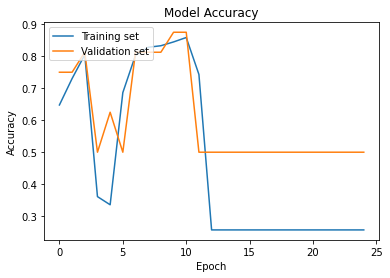

In [58]:
# Accuracy 
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [59]:
############################################################################

In [60]:
transfer_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [61]:
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [62]:
transfer_model.trainable = False

In [63]:
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [64]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [65]:
history3 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 5,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/5
163/163 [==============================] - 140s 857ms/step - loss: 1.2364 - accuracy: 0.6252 - val_loss: 0.5504 - val_accuracy: 0.6875
Epoch 2/5
163/163 [==============================] - 134s 821ms/step - loss: 0.8655 - accuracy: 0.7076 - val_loss: 0.4267 - val_accuracy: 0.8125
Epoch 3/5
163/163 [==============================] - 127s 780ms/step - loss: 0.7639 - accuracy: 0.7759 - val_loss: 0.3854 - val_accuracy: 0.8750
Epoch 4/5
163/163 [==============================] - 128s 786ms/step - loss: 0.7134 - accuracy: 0.8023 - val_loss: 0.3477 - val_accuracy: 0.8750
Epoch 5/5
163/163 [==============================] - 128s 786ms/step - loss: 0.7084 - accuracy: 0.8192 - val_loss: 0.3352 - val_accuracy: 0.9375


In [66]:
history3 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 5,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/5
163/163 [==============================] - 132s 811ms/step - loss: 0.6674 - accuracy: 0.8221 - val_loss: 0.3122 - val_accuracy: 0.9375
Epoch 2/5
163/163 [==============================] - 128s 785ms/step - loss: 0.6056 - accuracy: 0.8359 - val_loss: 0.2925 - val_accuracy: 1.0000
Epoch 3/5
163/163 [==============================] - 128s 788ms/step - loss: 0.5926 - accuracy: 0.8541 - val_loss: 0.2870 - val_accuracy: 1.0000
Epoch 4/5
163/163 [==============================] - 129s 794ms/step - loss: 0.5824 - accuracy: 0.8489 - val_loss: 0.2765 - val_accuracy: 1.0000
Epoch 5/5
163/163 [==============================] - 130s 795ms/step - loss: 0.5721 - accuracy: 0.8512 - val_loss: 0.2598 - val_accuracy: 1.0000


In [67]:
history3.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.functional.Functional at 0x1a0623bc700>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6673979759216309,
   0.605588972568512,
   0.592643678188324,
   0.5823740363121033,
   0.5721076726913452],
  'accuracy': [0.8220859169960022,
   0.8358895778656006,
   0.8541027903556824,
   0.8489263653755188,
   0.8512269854545593],
  'val_loss': [0.31223273277282715,
   0.29248303174972534,
   0.2869812250137329,
   0.276509165763855,
   0.25981372594833374],
  'val_accuracy': [0.9375, 1.0, 1.0, 1.0, 1.0]},
 'params': {'verbose': 1, 'epochs': 5, 'steps': 163},
 'epoch': [0, 1, 2, 3, 4]}

In [68]:
##############################
# Testing

### VGG16

In [2]:
# import keras

transfer_model_vgg16 = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [3]:
transfer_model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
# Freeze the transfer model
transfer_model_vgg16.trainable = False

In [5]:
# Create a new model on top of transfer model
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model_vgg16(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model_vgg16 = keras.Model(inputs, outputs)

In [6]:
# Compile the model
model_vgg16.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [10]:
# fit model 
history4 = model_vgg16.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 20,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1})  # model weight

Epoch 1/20
163/163 [==============================] - 200s 1s/step - loss: 1.0107 - accuracy: 0.6938 - val_loss: 0.5395 - val_accuracy: 0.8750
Epoch 2/20
163/163 [==============================] - 127s 781ms/step - loss: 0.6522 - accuracy: 0.8200 - val_loss: 0.4237 - val_accuracy: 0.9375
Epoch 3/20
163/163 [==============================] - 126s 771ms/step - loss: 0.5123 - accuracy: 0.8924 - val_loss: 0.3425 - val_accuracy: 0.9375
Epoch 4/20
163/163 [==============================] - 128s 785ms/step - loss: 0.6258 - accuracy: 0.8735 - val_loss: 0.3227 - val_accuracy: 0.9375
Epoch 5/20
163/163 [==============================] - 129s 791ms/step - loss: 0.4684 - accuracy: 0.8909 - val_loss: 0.3892 - val_accuracy: 0.9375
Epoch 6/20
163/163 [==============================] - 128s 783ms/step - loss: 0.4756 - accuracy: 0.8742 - val_loss: 0.3107 - val_accuracy: 0.9375
Epoch 7/20
163/163 [==============================] - 127s 776ms/step - loss: 0.4310 - accuracy: 0.8974 - val_loss: 0.2877 - va

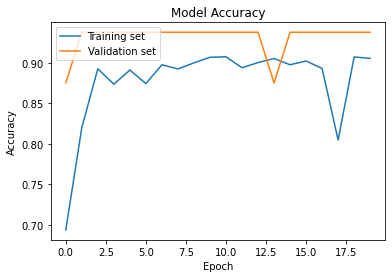

In [17]:
# Accuracy 
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
#################################
#################################
#################################
#################################
#################################
# testing weights

In [4]:
# import keras

transfer_model_vgg16 = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [6]:
transfer_model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
# Freeze the transfer model
transfer_model_vgg16.trainable = False

In [8]:
# Create a new model on top of transfer model
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model_vgg16(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model_vgg16 = keras.Model(inputs, outputs)

In [9]:
# Compile the model
model_vgg16.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [10]:
# fit model 
history4 = model_vgg16.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 15,
    validation_data = validation_set,
    class_weight={0:1 , 1:5})  # model weight testing

Epoch 1/15
163/163 [==============================] - 131s 802ms/step - loss: 57.2966 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/15
163/163 [==============================] - 128s 784ms/step - loss: 57.2966 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 130s 797ms/step - loss: 57.2966 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/15
163/163 [==============================] - 129s 792ms/step - loss: 57.2966 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/15
163/163 [==============================] - 129s 793ms/step - loss: 57.2966 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/15
163/163 [==============================] - 129s 793ms/step - loss: 57.2966 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/15
163/163 [==============================] - 130s 800ms/step - loss: 57.2966 - accuracy: 0.2571 - val_loss: 7

In [ ]:
# testing weights
#################################

In [78]:
# history5 = model_vgg16.fit(
#     training_set, 
#     steps_per_epoch = 163,
#     epochs = 50,
#     validation_data = validation_set,
#     class_weight={0:2.8 , 1:1}) # <--------------------------

In [79]:
# # Accuracy 
# plt.plot(history5.history['accuracy'])
# plt.plot(history5.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [80]:
# # Accuracy 
# plt.plot(history5.history['accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set'], loc='upper left')
# plt.show()

#### Fine Tuning

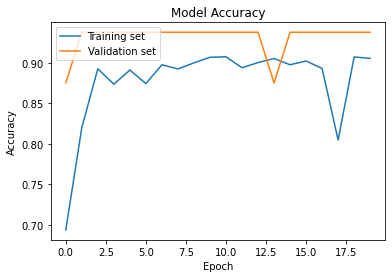

In [16]:
# Accuracy 
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [82]:
# Unfreeze the base model
transfer_model_vgg16.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model_vgg16.compile(optimizer=keras.optimizers.Adam(1e-5), # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

# Train end-to-end. Be careful to stop before you overfit!
history42 = model_vgg16.fit(
    training_set, 
    epochs=2, 
    validation_data=validation_set)


Epoch 1/2
163/163 [==============================] - 336s 2s/step - loss: 0.1616 - binary_accuracy: 0.9323 - val_loss: 0.2475 - val_binary_accuracy: 0.8750
Epoch 2/2
163/163 [==============================] - 336s 2s/step - loss: 0.1181 - binary_accuracy: 0.9526 - val_loss: 0.3352 - val_binary_accuracy: 0.9375


In [83]:
# # Unfreeze the base model
# transfer_model_vgg16.trainable = True

# # It's important to recompile your model after you make any changes
# # to the `trainable` attribute of any inner layer, so that your changes
# # are take into account
# model_vgg16.compile(optimizer=keras.optimizers.Adam(1e-5), # Very low learning rate
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[keras.metrics.BinaryAccuracy()])

# # Train end-to-end. Be careful to stop before you overfit!
# history42 = model_vgg16.fit(
#     training_set, 
#     epochs=15, 
#     validation_data=validation_set)


In [84]:
type(model_vgg16)

tensorflow.python.keras.engine.functional.Functional

#######################
#### temp

In [85]:
# https://stackoverflow.com/questions/50825936/confusion-matrix-on-images-in-cnn-keras

In [86]:
# y_pred = model_vgg16.predict(test_set)

In [87]:
# test_set

In [88]:
# test_set.labels

In [89]:
# y_pred

In [90]:
# y_pred.min

In [91]:
# from sklearn.metrics import confusion_matrix, classification_report

# y_pred = model_vgg16.predict(test_set)
# print(classification_report(test_set.labels, y_pred))

In [92]:
# # Training confusion matrix
# plot_confusion_matrix(model_vgg16, X_train, y_train)

In [20]:
# from sklearn.metrics import confusion_matrix, classification_report

# #Confution Matrix and Classification Report
# Y_pred = model_vgg16.predict(validation_set)
# model_vgg16.evaluate(validation_set)
# y_pred = np.where(Y_pred>0.5, 1, 0)
# print('Confusion Matrix')
# print(confusion_matrix(validation_set.classes, y_pred))
# print('Classification Report')
# target_names = os.listdir(train_generator)
# print(classification_report(validation_set.classes, y_pred, target_names=target_names))
# plt.figure(figsize=(10,8))
# plt.title('Predicted classes', size=14)
# sns.heatmap(confusion_matrix(validation_set.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
# plt.show()

In [11]:
#############
# test_generator = ImageDataGenerator()
# test_data_generator = test_generator.flow_from_directory(
#     test_data_path, # Put your path here
#      target_size=(img_width, img_height),
#     batch_size=32,
#     shuffle=False)

# test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model_vgg16.predict(test_set)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [12]:
predictions

array([[-1.0903181 ],
       [-0.92082036],
       [-0.9535042 ],
       [-0.75987196],
       [-0.99674404],
       [-0.7535132 ],
       [-0.9313269 ],
       [-0.7985356 ],
       [-0.912753  ],
       [-0.66669774],
       [-1.0704474 ],
       [-1.0365099 ],
       [-1.3077848 ],
       [-1.1472075 ],
       [-1.3195467 ],
       [-0.79795   ],
       [-0.9348359 ],
       [-1.1419237 ],
       [-1.0795481 ],
       [-1.4268328 ],
       [-0.7979291 ],
       [-0.63267505],
       [-0.7249283 ],
       [-1.008122  ],
       [-0.94291186],
       [-0.8940587 ],
       [-1.2997813 ],
       [-1.0529732 ],
       [-1.1031752 ],
       [-0.80672985],
       [-0.9869578 ],
       [-1.0091735 ],
       [-0.8361948 ],
       [-1.1210661 ],
       [-0.55658996],
       [-1.1910824 ],
       [-0.9754633 ],
       [-0.8210416 ],
       [-0.9125231 ],
       [-0.7139753 ],
       [-0.6766801 ],
       [-0.8187932 ],
       [-1.1265893 ],
       [-0.71895623],
       [-0.81112266],
       [-1

In [13]:
predicted_classes.sum()

0

In [18]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [21]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



C:\Users\aiden.local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
##########################################

In [100]:
######################## del
test_accu = model.evaluate(test_set, steps=124)
print('The testing accuracy is :', test_accu[1]*100, '%')

 20/124 [===>..........................] - 13s 651ms/step - loss: 0.4239 - accuracy: 0.8301
The testing accuracy is : 83.01281929016113 %


In [101]:
######################## del
test_accu = model.evaluate_generator(test_set, steps=624)
print('The testing accuracy is :', test_accu[1]*100, '%')

Instructions for updating:
Please use Model.evaluate, which supports generators.
The testing accuracy is : 83.01281929016113 %


In [102]:
#########################################################

In [103]:
transfer_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [104]:
# Create a new model on top of transfer model
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [105]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [106]:
# fit model 
history4 = model.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 50,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) # <--------------------------

Epoch 1/50
163/163 [==============================] - 337s 2s/step - loss: 11.3948 - accuracy: 0.2604 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/50
163/163 [==============================] - 335s 2s/step - loss: 11.4593 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/50
163/163 [==============================] - 338s 2s/step - loss: 11.4593 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/50
163/163 [==============================] - 351s 2s/step - loss: 11.4593 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/50
163/163 [==============================] - 344s 2s/step - loss: 11.4593 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/50
163/163 [==============================] - 338s 2s/step - loss: 11.4593 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/50
163/163 [==============================] - 338s 2s/step - loss: 11.4593 - accuracy: 0.2571 - val_loss: 7.7125 - val_accuracy:

In [107]:
####

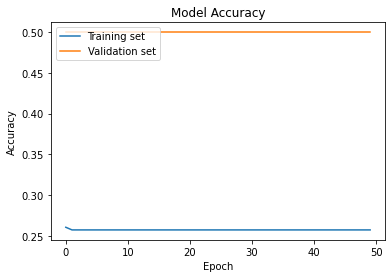

In [108]:
# Accuracy 
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
# Unfreeze the base model
transfer_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5), # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

# Train end-to-end. Be careful to stop before you overfit!
history42 = model.fit(
    training_set, 
    epochs=20, 
    validation_data=validation_set)


Epoch 1/20
163/163 [==============================] - 335s 2s/step - loss: 8873935.0000 - binary_accuracy: 0.5203 - val_loss: 43969.8203 - val_binary_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 336s 2s/step - loss: 25482.8730 - binary_accuracy: 0.6129 - val_loss: 4488.5029 - val_binary_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 340s 2s/step - loss: 37852.0352 - binary_accuracy: 0.6179 - val_loss: 38989.3789 - val_binary_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 334s 2s/step - loss: 42071.6836 - binary_accuracy: 0.6077 - val_loss: 89290.7188 - val_binary_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 334s 2s/step - loss: 30935.6016 - binary_accuracy: 0.6131 - val_loss: 39839.0547 - val_binary_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 335s 2s/step - loss: 40004.8281 - binary_accuracy: 0.6102 - val_loss: 24188.6855 - val_binary_accuracy: 0.5000
Epoch 7/2

### VGG19

In [22]:
transfer_model_vgg19 = keras.applications.VGG19(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [23]:
transfer_model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
# Free the transfer model
transfer_model_vgg19.trainable = False

In [25]:
# Create a new model on top of transfer model
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = transfer_model_vgg19(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model_vgg19 = keras.Model(inputs, outputs)

In [26]:
# Compile the model
model_vgg19.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [27]:
# fit model 
history_vgg19 = model_vgg19.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 2,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) 

Epoch 1/2
163/163 [==============================] - 197s 1s/step - loss: 0.7074 - accuracy: 0.7966 - val_loss: 0.3364 - val_accuracy: 0.8750
Epoch 2/2
163/163 [==============================] - 138s 846ms/step - loss: 0.5236 - accuracy: 0.8712 - val_loss: 0.3115 - val_accuracy: 0.8750


### Xception

In [28]:
# Transfer Model Xception
tm_Xception = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [29]:
tm_Xception.trainable = False

In [30]:
inputs = keras.Input(shape=(150, 150, 3))
#  transfer_model is running in inference mode by passing `training=False`. 
x = tm_Xception(inputs, training=False)
# Convert features of shape `transfer_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model_Xception = keras.Model(inputs, outputs)

In [31]:
# Compile the model
model_Xception.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [32]:
history_Xception = model_Xception.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 3,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) 

Epoch 1/3
163/163 [==============================] - 112s 690ms/step - loss: 2.0810 - accuracy: 0.6398 - val_loss: 0.4150 - val_accuracy: 0.7500
Epoch 2/3
163/163 [==============================] - 109s 670ms/step - loss: 1.1367 - accuracy: 0.7442 - val_loss: 0.3032 - val_accuracy: 0.9375
Epoch 3/3
163/163 [==============================] - 110s 678ms/step - loss: 1.5894 - accuracy: 0.7786 - val_loss: 0.2769 - val_accuracy: 0.9375


In [33]:
history_Xception = model_Xception.fit(
    training_set, 
    steps_per_epoch = 163,
    epochs = 50,
    validation_data = validation_set,
    class_weight={0:2.8 , 1:1}) 

Epoch 1/50
163/163 [==============================] - 109s 671ms/step - loss: 2.9028 - accuracy: 0.7362 - val_loss: 2.3191 - val_accuracy: 0.7500
Epoch 2/50
163/163 [==============================] - 108s 660ms/step - loss: 2.1258 - accuracy: 0.7766 - val_loss: 2.0125 - val_accuracy: 0.8125
Epoch 3/50
163/163 [==============================] - 109s 667ms/step - loss: 2.1937 - accuracy: 0.8313 - val_loss: 1.1427 - val_accuracy: 0.8125
Epoch 4/50
163/163 [==============================] - 108s 664ms/step - loss: 2.0779 - accuracy: 0.7565 - val_loss: 1.2793 - val_accuracy: 0.8125
Epoch 5/50
163/163 [==============================] - 109s 670ms/step - loss: 1.3367 - accuracy: 0.8217 - val_loss: 1.0551 - val_accuracy: 0.8750
Epoch 6/50
163/163 [==============================] - 110s 674ms/step - loss: 1.5394 - accuracy: 0.8393 - val_loss: 6.8038 - val_accuracy: 0.5000
Epoch 7/50
163/163 [==============================] - 110s 673ms/step - loss: 10.9085 - accuracy: 0.7423 - val_loss: 7.6246 

In [34]:
# Testing
################################

In [35]:
# # Accuracy 
# plt.plot(history3.history['accuracy'])
# plt.plot(history3.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

NameError: name 'history3' is not defined

In [ ]:
# history4 = model.fit(
#     training_set, 
#     steps_per_epoch = 163,
#     epochs = 25,
#     validation_data = validation_set,
#     class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
# history4.__dict__

In [ ]:
# # Accuracy 
# plt.plot(history4.history['accuracy'])
# plt.plot(history4.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [ ]:
# history5 = model.fit(
#     training_set, 
#     steps_per_epoch = 163,
#     epochs = 25,
#     validation_data = validation_set,
#     batch_size = 100,
#     class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
# history5.__dict__

In [ ]:
# # Accuracy 
# plt.plot(history4.history['accuracy'])
# plt.plot(history4.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [ ]:
# history6 = model.fit(
#     training_set, 
#     steps_per_epoch = 163,
#     epochs = 125,
#     validation_data = validation_set,
#     batch_size = 100,
#     class_weight={0:2.8 , 1:1}) # <--------------------------

In [ ]:
# # Accuracy 
# plt.plot(history6.history['accuracy'])
# plt.plot(history6.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()

In [ ]:
# test_acc = model.evaluate(test_set, steps=624)
# print('The testing accuracy is :', test_acc[1]*100, '%')

In [ ]:
# history7 = model.fit(
#     training_set, 
#     steps_per_epoch = 163,
#     epochs = 50,
#     validation_data = validation_set,
#     batch_size = 50,
#     class_weight={0:2.8 , 1:1}) # <--------------------------

## Evaluation

In [ ]:
# https://stackoverflow.com/questions/56156229/how-to-use-kfold-cross-validation-output-as-cnn-input-for-image-processing

In [ ]:
test_acc = model.evaluate(test_set, steps=624)
# print('The testing accuracy is :', test_acc[1]*100, '%')

## Conclusion

<!-- https://pubmed.ncbi.nlm.nih.gov/18299488/ -->
<!-- https://pubmed.ncbi.nlm.nih.gov/15759443/ -->

Doctors also make mistakes. This model specifically likely should not be deployed but an improved model will likely be able to outperform human doctors

## Future Work

Notes on current solution
- Pediatric patients. Adult chest x-ray results may vary
- Low val dataset
- Relatively low iterations/testing of model architecture. I could have downsampled my data to try and get more iterations 


- Based off the seriousness of the problem any prediction that is under a certain confidence level should be reviewed by a doctor before taking further actions


Future Work
- More Data Augmentation
- Collect a larger dataset
- Collect more research on the error rates of doctors for diagnosing pneumonia